In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

for dirname,_,filenames in os.walk('/kaggle/input'):
    print(dirname)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input
/kaggle/input/rock-paper-scissors
/kaggle/input/rock-paper-scissors/valid
/kaggle/input/rock-paper-scissors/valid/labels
/kaggle/input/rock-paper-scissors/valid/images
/kaggle/input/rock-paper-scissors/test
/kaggle/input/rock-paper-scissors/test/labels
/kaggle/input/rock-paper-scissors/test/images
/kaggle/input/rock-paper-scissors/train
/kaggle/input/rock-paper-scissors/train/labels
/kaggle/input/rock-paper-scissors/train/images


### Using Command-Line Interface

#### Creating yml for YOLOv11

In [7]:

yaml_content = """
train: /kaggle/input/rock-paper-scissors/train/images
val: /kaggle/input/rock-paper-scissors/valid/images
test: /kaggle/input/rock-paper-scissors/test/images

nc: 3
names: ['rock', 'paper', 'scissors']
"""


yaml_path = "/kaggle/working/rock-paper-scissors.yaml"
with open(yaml_path, "w") as f:
    f.write(yaml_content)

print("YAML file created at:", yaml_path)


YAML file created at: /kaggle/working/rock-paper-scissors.yaml


In [2]:
!pip install -U ultralytics
import ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 105.5 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.0 MB/s eta 0:00:00:00:0100:01
  Attempting uninst

#### Model Training

In [8]:
!yolo train model=yolo11m.pt data='/kaggle/working/rock-paper-scissors.yaml' epochs=25 imgsz=640 save_period=5

Ultralytics 8.3.191 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/rock-paper-scissors.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=25, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.

#### Model Validation

In [19]:
!ls /kaggle/working/runs/detect/train2/weights/

best.pt  epoch0.pt  epoch10.pt	epoch15.pt  epoch20.pt	epoch5.pt  last.pt


In [23]:
!yolo val model='/kaggle/working/runs/detect/train2/weights/best.pt' data='/kaggle/working/rock-paper-scissors.yaml'

Ultralytics 8.3.191 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access ✅ (ping: 1.9±0.4 ms, read: 85.6±58.7 MB/s, size: 41.7 KB)
val: Scanning /kaggle/input/rock-paper-scissors/valid/labels... 576 images, 238 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 576/576 622.4it/s 0.9s<0.0s
WARNING ⚠️ val: Cache directory /kaggle/input/rock-paper-scissors/valid is not writeable, cache not saved.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 36/36 2.3it/s 15.8s0.4s
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
                   all        576        400      0.948      0.897       0.94      0.754
     

#### Inferencing with Model

In [33]:
# !pip install opencv-python
# !pip install matplotlib
import cv2 as cv
from matplotlib import pyplot as plt

def show_image(image_path):
    image = cv.imread(image_path)
    if image is None:
        print("Image is not found")
    img_rgb = cv.cvtColor(image,cv.COLOR_BGR2RGB)
    plt.imshow(img_rgb)

In [38]:
!yolo predict model='/kaggle/working/runs/detect/train2/weights/best.pt' source='/kaggle/input/rock-paper-scissors/test/images/IMG_5567_mp4-16_jpg.rf.d32a3cb377e3bc260a0a841e47831a4a.jpg'

Ultralytics 8.3.191 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs

image 1/1 /kaggle/input/rock-paper-scissors/test/images/IMG_5567_mp4-16_jpg.rf.d32a3cb377e3bc260a0a841e47831a4a.jpg: 640x640 1 scissors, 47.6ms
Speed: 3.6ms preprocess, 47.6ms inference, 151.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict6
💡 Learn more at https://docs.ultralytics.com/modes/predict


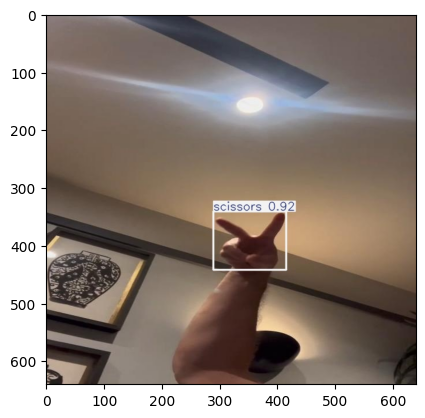

In [39]:
show_image('/kaggle/working/runs/detect/predict6/IMG_5567_mp4-16_jpg.rf.d32a3cb377e3bc260a0a841e47831a4a.jpg')

##### Exporting in ONNX for faster inferencing Speeds on CPU

In [42]:
!yolo export model='/kaggle/working/runs/detect/train2/weights/best.pt' format=onnx

Ultralytics 8.3.191 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.00GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/
YOLO11m summary (fused): 125 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs

PyTorch: starting from '/kaggle/working/runs/detect/train2/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 7, 8400) (38.6 MB)
requirements: Ultralytics requirements ['onnxslim>=0.1.65', 'onnxruntime'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 1.4s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.18.0 opset 19...
ONNX: slimming with onnxslim 0.1.65...
ONNX: export success ✅ 6.3s, saved as '/kaggle/working/runs/detect/train2/weights/best.onnx' (76.7 MB)

Export complete (7.9s)
Results saved to /kaggle/working/runs/detect/train2/weights
Predict:         y

##### Exporting in TensorRT for faster inferencing Speeds on GPU

In [43]:
!yolo export model='/kaggle/working/runs/detect/train2/weights/best.pt' format=engine

WARNING ⚠️ TensorRT requires GPU export, automatically assigning device=0
Ultralytics 8.3.191 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs

PyTorch: starting from '/kaggle/working/runs/detect/train2/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 7, 8400) (38.6 MB)
requirements: Ultralytics requirement ['onnxruntime-gpu'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 3.5s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.18.0 opset 19...
ONNX: slimming with onnxslim 0.1.65...
ONNX: export success ✅ 6.8s, saved as '/kaggle/working/runs/detect/train2/weights/best.onnx' (76.7 MB)
requirements: Ultralytics requirement ['tensorrt>7.0.0,!=10.1.0'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 24.9s
WARNING ⚠️ requirements: Restart runtime

##### For Intel Hardware

In [44]:
!yolo export model='/kaggle/working/runs/detect/train2/weights/best.pt' format=OpenVINO

Ultralytics 8.3.191 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.00GHz)
YOLO11m summary (fused): 125 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs

PyTorch: starting from '/kaggle/working/runs/detect/train2/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 7, 8400) (38.6 MB)
requirements: Ultralytics requirement ['openvino>=2024.0.0'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 1.2s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


OpenVINO: starting export with openvino 2025.2.0-19140-c01cd93e24d-releases/2025/2...
OpenVINO: export success ✅ 8.7s, saved as '/kaggle/working/runs/detect/train2/weights/best_openvino_model/' (76.9 MB)

Export complete (10.3s)
Results saved to /kaggle/working/runs/detect/train2/weights
Predict:         yolo predict task=detect model=/kaggle/working/runs/detect/train2/weights/best_openvino_model imgsz=640  
Validate:        yolo val task=detect m

### Python Usage

In [3]:
from ultralytics import YOLO

In [4]:

model = YOLO('yolo11n.pt')

# model train
results = model.train(data='/kaggle/input/rock-paper-scissors/data.yaml',epochs=1)

Ultralytics 8.3.191 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/rock-paper-scissors/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        576        400      0.501      0.437      0.449      0.257

1 epochs completed in 0.022 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.191 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 18/18 4.3it/s 4.1s0.2s


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        576        400      0.504      0.437      0.449      0.256
                 Paper        132        139      0.349      0.367      0.315      0.154
                  Rock        121        141      0.548      0.518      0.529      0.321
              Scissors        116        120      0.614      0.425      0.503      0.293
Speed: 0.2ms preprocess, 2.4ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/train


In [5]:
# model evaluate mode
val_results = model.val()

Ultralytics 8.3.191 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 1.7±2.3 ms, read: 52.1±28.1 MB/s, size: 29.1 KB)
val: Scanning /kaggle/input/rock-paper-scissors/valid/labels... 576 images, 238 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 576/576 1025.3it/s 0.6s.1s
WARNING ⚠️ val: Cache directory /kaggle/input/rock-paper-scissors/valid is not writeable, cache not saved.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 36/36 7.1it/s 5.1s0.1s


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        576        400      0.501      0.437       0.45      0.256
                 Paper        132        139       0.35      0.367      0.315      0.154
                  Rock        121        141      0.546      0.518      0.531      0.322
              Scissors        116        120      0.608      0.427      0.504      0.294
Speed: 0.5ms preprocess, 4.0ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/train2


In [9]:
model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')
# predicting on image
results = model('/kaggle/input/rock-paper-scissors/valid/images/0098_png.rf.e8204ac2df5ddc983871216ed8d2de00.jpg')



image 1/1 /kaggle/input/rock-paper-scissors/valid/images/0098_png.rf.e8204ac2df5ddc983871216ed8d2de00.jpg: 640x640 1 Rock, 11.7ms
Speed: 1.8ms preprocess, 11.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
# exporting the model to ONNX format
# results = model.export(format='onnx')
# results = model.export(format='engine')